Found dataset pairs: ['MosA1_MosA2', 'MosA2_MosA1', 'MosM1_MosM2', 'MosM2_MosM1', 'MosP2_MosP1', 'MosP1_MosP2', 'LungB_LungA', 'WholeBrainB_WholeBrainA', 'LungA_LungB', 'WholeBrainA_WholeBrainB', 'BoneMarrowA_BoneMarrowB', 'BoneMarrowB_BoneMarrowA', 'LargeIntestineA_LargeIntestineB', 'LargeIntestineB_LargeIntestineA']
Corresponding reference datasets: ['MosA1', 'MosA2', 'MosM1', 'MosM2', 'MosP2', 'MosP1', 'LungB', 'WholeBrainB', 'LungA', 'WholeBrainA', 'BoneMarrowA', 'BoneMarrowB', 'LargeIntestineA', 'LargeIntestineB']
Corresponding imbalance degrees: [0.0519, 0.052, 0.0591, 0.061, 0.0674, 0.0683, 0.2833, 0.3003, 0.3078, 0.3197, 0.4232, 0.4356, 0.688, 0.8989]
Method RF, Dataset pair MosA1_MosA2, Kappa value: 0.77453044070273
Method RF, Dataset pair MosA2_MosA1, Kappa value: 0.7295574802243601
Method RF, Dataset pair MosM1_MosM2, Kappa value: 0.7050833339590694
Method RF, Dataset pair MosM2_MosM1, Kappa value: 0.7298120944454631
Method RF, Dataset pair MosP2_MosP1, Kappa value: 0.772075

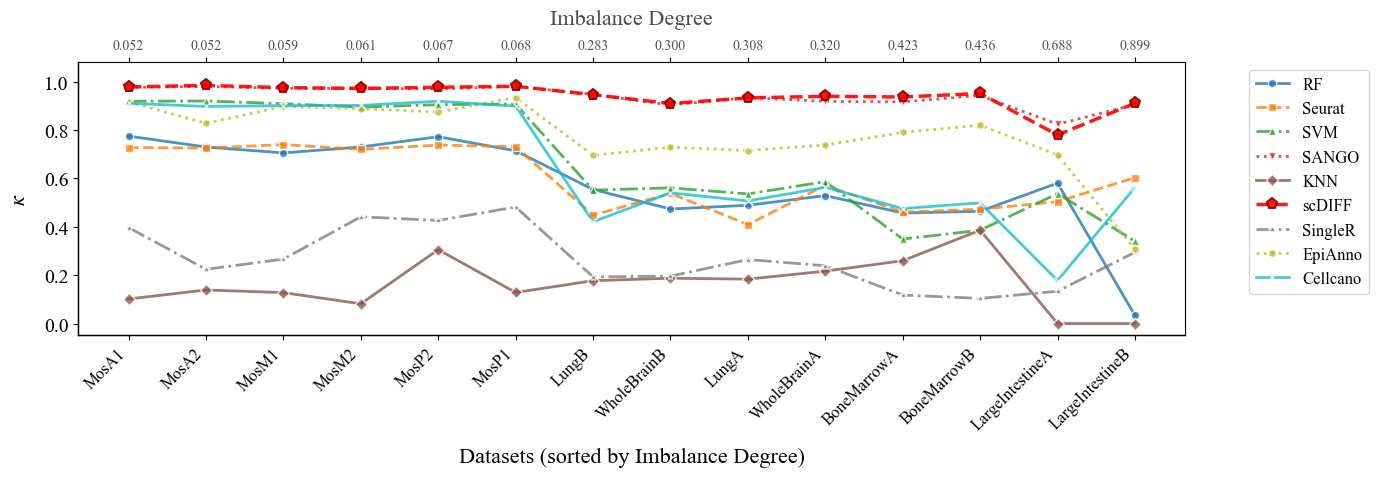

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def combine_results(base_dir):
    """
    Combine all method result files and process method names
    """
    all_data = []
    
    # Get all csv files
    method_files = [f for f in os.listdir(base_dir) if f.endswith('.csv')]
    
    for file in method_files:
        # Get method name from filename and remove _res suffix
        method = file.replace('.csv', '').replace('_res', '')
        
        # Read data
        df = pd.read_csv(os.path.join(base_dir, file))
        df['Method'] = method
        all_data.append(df)
    
    # Combine all data
    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

# Dataset imbalance information (extracted from table)
# This stores the imbalance degree of reference datasets
reference_imbalance = {
    'MosA2': 0.052,
    'MosA1': 0.0519,
    'MosP1': 0.0683,
    'MosM1': 0.0591,
    'MosM2': 0.061,
    'MosP2': 0.0674,
    'LungB': 0.2833,
    'WholeBrainB': 0.3003,
    'LungA': 0.3078,
    'WholeBrainA': 0.3197,
    'PreFrontalCortex': 0.3308,
    'BoneMarrowA': 0.4232,
    'BoneMarrowB': 0.4356,
    'Cerebellum': 0.4501,
    'LargeIntestineA': 0.688,
    'LargeIntestineB': 0.8989
}

def extract_reference_dataset(dataset_pair):
    """
    Extract reference dataset name from dataset pair name
    Example: 'BoneMarrowA_BoneMarrowB' -> 'BoneMarrowA'
    """
    return dataset_pair.split('_')[0]

def get_metric_label(metric):
    """
    Return appropriate mathematical symbol labels for different metrics
    """
    metric_labels = {
        'Kappa': r'$\kappa$'
    }
    return metric_labels.get(metric, metric)

def create_line_plot(combined_df, metric='Kappa', figsize=(14, 5)):
    """
    Create line plot of method performance on datasets sorted by imbalance degree
    """
    # Set font style - updated configuration to support mathematical symbols
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif', 'Computer Modern Roman'],
        'mathtext.fontset': 'stix',  # Use STIX font set for better Greek letter support
        'mathtext.rm': 'serif',
        'mathtext.it': 'serif:italic',
        'mathtext.bf': 'serif:bold',
        'text.usetex': False,  # Ensure no LaTeX dependency
        'axes.unicode_minus': False,  # Prevent minus sign display issues
        'font.size': 14,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 14,
        'legend.fontsize': 12
    })
    
    # Extract reference datasets from dataset pairs and get imbalance degrees
    dataset_pairs = combined_df['Dataset'].unique()
    reference_datasets = []
    
    for pair in dataset_pairs:
        ref_dataset = extract_reference_dataset(pair)
        if ref_dataset in reference_imbalance:
            reference_datasets.append((ref_dataset, pair, reference_imbalance[ref_dataset]))
    
    # Sort by imbalance degree
    reference_datasets.sort(key=lambda x: x[2])  # Sort by imbalance degree
    
    # Extract sorted reference dataset names and corresponding dataset pairs
    sorted_references = [item[0] for item in reference_datasets]
    sorted_pairs = [item[1] for item in reference_datasets]
    sorted_imbalances = [item[2] for item in reference_datasets]
    
    # Get all methods
    methods = combined_df['Method'].unique()
    
    print(f"Found dataset pairs: {sorted_pairs}")
    print(f"Corresponding reference datasets: {sorted_references}")
    print(f"Corresponding imbalance degrees: {sorted_imbalances}")
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set background
    ax.set_facecolor('white')
    
    # Set borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['left'].set_linewidth(1.0)
    
    # Define line styles and marker styles
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'h', 'x', '+', '<', '>']
    colors = plt.cm.tab10(np.linspace(0, 1, len(methods)))
    
    # Draw line for each method
    for i, method in enumerate(methods):
        method_data = combined_df[combined_df['Method'] == method]
        
        x_values = []
        y_values = []
        
        # Get data in the order of sorted dataset pairs
        for j, dataset_pair in enumerate(sorted_pairs):
            if dataset_pair in method_data['Dataset'].values:
                metric_value = method_data[method_data['Dataset'] == dataset_pair][metric].iloc[0]
                x_values.append(j)
                y_values.append(metric_value)
                print(f"Method {method}, Dataset pair {dataset_pair}, {metric} value: {metric_value}")
            else:
                print(f"Warning: Method {method} has no data on dataset pair {dataset_pair}")
                # Skip missing data points
                continue
        
        # Only draw line when there is data
        if len(x_values) > 0 and len(y_values) > 0:
            # Draw line
            line_style = line_styles[i % len(line_styles)]
            marker_style = markers[i % len(markers)]
            
            # Special handling for scDIFF method to make it more prominent
            if method == 'scDIFF':
                ax.plot(x_values, y_values, 
                       linestyle=line_style, 
                       marker=marker_style, 
                       color='red',  # Use red to highlight
                       linewidth=2.5,
                       markersize=8,
                       markerfacecolor='red',
                       markeredgecolor='darkred',
                       markeredgewidth=1.5,
                       label=method,
                       alpha=0.9,
                       zorder=10)  # Ensure on top layer
            else:
                ax.plot(x_values, y_values, 
                       linestyle=line_style, 
                       marker=marker_style, 
                       color=colors[i],
                       linewidth=2,
                       markersize=6,
                       markerfacecolor=colors[i],
                       markeredgecolor='white',
                       markeredgewidth=1,
                       label=method,
                       alpha=0.8)
    
    # Set x-axis
    ax.set_xticks(range(len(sorted_references)))
    ax.set_xticklabels(sorted_references, rotation=45, ha='right')
    
    # Set y-axis - use mathematical symbol labels
    metric_label = get_metric_label(metric)
    ax.set_ylabel(f'{metric_label}', fontweight='normal', labelpad=10)
    
    # Set y-axis range
    y_min = combined_df[metric].min()
    y_max = combined_df[metric].max()
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.05 * y_range, y_max + 0.1 * y_range)
    
    # Add secondary x-axis labels showing imbalance degrees
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(range(len(sorted_references)))
    imbalance_labels = [f'{imb:.3f}' for imb in sorted_imbalances]
    ax2.set_xticklabels(imbalance_labels, fontsize=10, alpha=0.7)
    ax2.set_xlabel('Imbalance Degree', fontweight='normal', alpha=0.7, labelpad=10)
    
    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
             frameon=True, fancybox=True, shadow=False)
    
    # Set title
    ax.set_xlabel('Datasets (sorted by Imbalance Degree)', fontweight='normal', labelpad=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    # plt.savefig(f'line_plot_{metric}_by_imbalance.svg', dpi=300, bbox_inches='tight')
    # plt.savefig(f'line_plot_{metric}_by_imbalance.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_line_plot_with_reference_query_pairs(combined_df, metric='Kappa', figsize=(20,5)):
    """
    Create line plot version for reference-query dataset pairs
    If your datasets are paired, this function can handle pairing relationships
    """
    # Dataset pairing information (adjust according to your needs)
    dataset_pairs = {
        'BoneMarrow': ['BoneMarrowA', 'BoneMarrowB'],
        'Lung': ['LungA', 'LungB'],
        'LargeIntestine': ['LargeIntestineA', 'LargeIntestineB'],
        'WholeBrain': ['WholeBrainA', 'WholeBrainB'],
        'Mos': ['MosA1', 'MosA2', 'MosM1', 'MosM2', 'MosP1', 'MosP2'],
        'Single': ['Cerebellum', 'PreFrontalCortex']
    }
    
    # Expand all datasets and sort by imbalance degree
    all_datasets = []
    for pair_datasets in dataset_pairs.values():
        all_datasets.extend(pair_datasets)
    
    # Sort by imbalance degree
    available_datasets = [d for d in all_datasets if d in combined_df['Dataset'].values and d in reference_imbalance]
    datasets_sorted = sorted(available_datasets, key=lambda x: reference_imbalance[x])
    
    # Use previous plotting logic
    create_line_plot(combined_df, metric, figsize)

# Usage example
if __name__ == "__main__":
    # Assuming you already have combined_df
    combined_df = combine_results("/home/daozhang/Draw_picture/result")
    
    # Create line plot for Kappa values
    create_line_plot(combined_df, metric='Kappa')
    
    pass

Found dataset pairs: ['MosA1_MosA2', 'MosA2_MosA1', 'MosM1_MosM2', 'MosM2_MosM1', 'MosP1_MosP2', 'MosP2_MosP1', 'BoneMarrowB_BoneMarrowA', 'BoneMarrowA_BoneMarrowB', 'LargeIntestineA_LargeIntestineB', 'LargeIntestineB_LargeIntestineA', 'WholeBrainA_WholeBrainB', 'WholeBrainB_WholeBrainA', 'LungB_LungA', 'LungA_LungB']
Corresponding reference datasets: ['MosA2', 'MosA1', 'MosM2', 'MosM1', 'MosP2', 'MosP1', 'BoneMarrowA', 'BoneMarrowB', 'LargeIntestineB', 'LargeIntestineA', 'WholeBrainB', 'WholeBrainA', 'LungA', 'LungB']
Corresponding cell type counts: [6, 6, 6, 6, 6, 6, 14, 17, 17, 17, 19, 20, 21, 24]
Method RF, Dataset pair MosA1_MosA2, Kappa value: 0.77453044070273
Method RF, Dataset pair MosA2_MosA1, Kappa value: 0.7295574802243601
Method RF, Dataset pair MosM1_MosM2, Kappa value: 0.7050833339590694
Method RF, Dataset pair MosM2_MosM1, Kappa value: 0.7298120944454631
Method RF, Dataset pair MosP1_MosP2, Kappa value: 0.7138295450022474
Method RF, Dataset pair MosP2_MosP1, Kappa value:

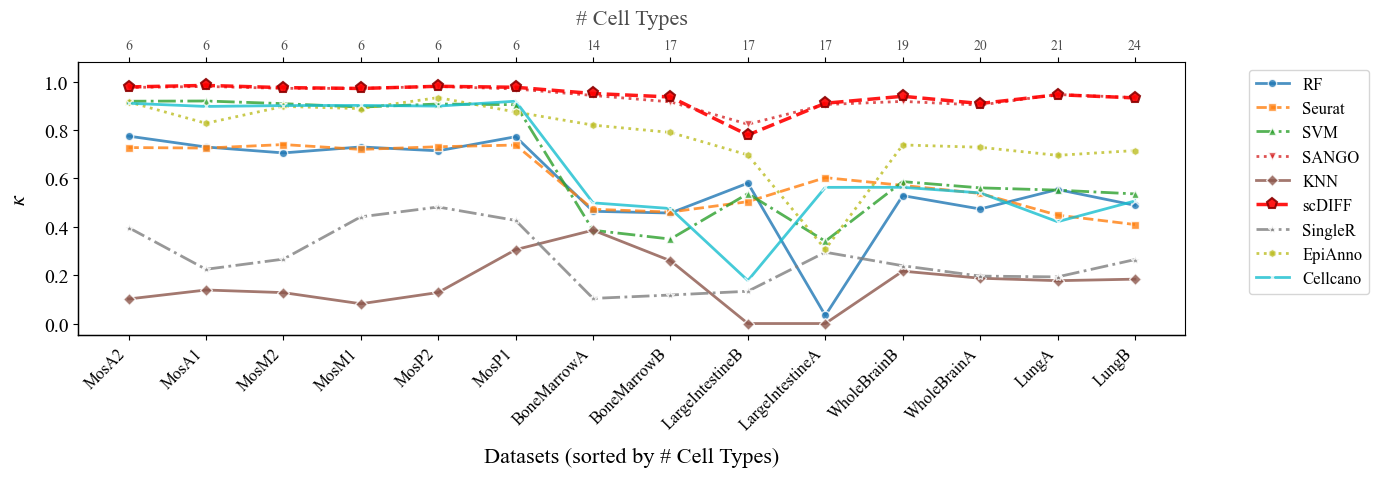

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def combine_results(base_dir):
    """
    Combine all method result files and process method names
    """
    all_data = []
    
    # Get all csv files
    method_files = [f for f in os.listdir(base_dir) if f.endswith('.csv')]
    
    for file in method_files:
        # Get method name from filename and remove _res suffix
        method = file.replace('.csv', '').replace('_res', '')
        
        # Read data
        df = pd.read_csv(os.path.join(base_dir, file))
        df['Method'] = method
        all_data.append(df)
    
    # Combine all data
    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

# Dataset cell type count information (extracted from table)
# This stores the number of cell types for reference datasets
reference_cell_types = {
    'MosA1': 6,
    'MosA2': 6,
    'MosM1': 6,
    'MosM2': 6,
    'MosP1': 6,
    'MosP2': 6,
    'BoneMarrowA': 14,
    'LargeIntestineA': 17,
    'LargeIntestineB': 17,
    'BoneMarrowB': 17,
    'Cerebellum': 19,
    'WholeBrainB': 19,
    'WholeBrainA': 20,
    'LungA': 21,
    'PreFrontalCortex': 21,
    'LungB': 24
}

def extract_reference_dataset(dataset_pair):
    """
    Extract reference dataset name from dataset pair name
    Example: 'BoneMarrowA_BoneMarrowB' -> 'BoneMarrowB'
    """
    return dataset_pair.split('_')[1]

def get_metric_label(metric):
    """
    Return appropriate mathematical symbol labels for different metrics
    """
    metric_labels = {
        'Kappa': r'$\kappa$'
    }
    return metric_labels.get(metric, metric)

def create_line_plot_by_cell_types(combined_df, metric='Kappa', figsize=(14, 5)):
    """
    Create line plot of method performance on datasets sorted by number of cell types (low to high)
    """
    # Set font style - updated configuration to support mathematical symbols
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif', 'Computer Modern Roman'],
        'mathtext.fontset': 'stix',  # Use STIX font set for better Greek letter support
        'mathtext.rm': 'serif',
        'mathtext.it': 'serif:italic',
        'mathtext.bf': 'serif:bold',
        'text.usetex': False,  # Ensure no LaTeX dependency
        'axes.unicode_minus': False,  # Prevent minus sign display issues
        'font.size': 14,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 14,
        'legend.fontsize': 12
    })
    
    # Extract reference datasets from dataset pairs and get cell type counts
    dataset_pairs = combined_df['Dataset'].unique()
    reference_datasets = []
    
    for pair in dataset_pairs:
        ref_dataset = extract_reference_dataset(pair)
        if ref_dataset in reference_cell_types:
            reference_datasets.append((ref_dataset, pair, reference_cell_types[ref_dataset]))
    
    # Sort by cell type count from low to high
    reference_datasets.sort(key=lambda x: x[2])  # Sort from low to high
    
    # Extract sorted reference dataset names and corresponding dataset pairs
    sorted_references = [item[0] for item in reference_datasets]
    sorted_pairs = [item[1] for item in reference_datasets]
    sorted_cell_types = [item[2] for item in reference_datasets]
    
    # Get all methods
    methods = combined_df['Method'].unique()
    
    print(f"Found dataset pairs: {sorted_pairs}")
    print(f"Corresponding reference datasets: {sorted_references}")
    print(f"Corresponding cell type counts: {sorted_cell_types}")
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set background
    ax.set_facecolor('white')
    
    # Set borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['left'].set_linewidth(1.0)
    
    # Define line styles and marker styles
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'h', 'x', '+', '<', '>']
    colors = plt.cm.tab10(np.linspace(0, 1, len(methods)))
    
    # Draw line for each method
    for i, method in enumerate(methods):
        method_data = combined_df[combined_df['Method'] == method]
        
        x_values = []
        y_values = []
        
        # Get data in the order of sorted dataset pairs
        for j, dataset_pair in enumerate(sorted_pairs):
            if dataset_pair in method_data['Dataset'].values:
                metric_value = method_data[method_data['Dataset'] == dataset_pair][metric].iloc[0]
                x_values.append(j)
                y_values.append(metric_value)
                print(f"Method {method}, Dataset pair {dataset_pair}, {metric} value: {metric_value}")
            else:
                print(f"Warning: Method {method} has no data on dataset pair {dataset_pair}")
                # Skip missing data points
                continue
        
        # Only draw line when there is data
        if len(x_values) > 0 and len(y_values) > 0:
            # Draw line
            line_style = line_styles[i % len(line_styles)]
            marker_style = markers[i % len(markers)]
            
            # Special handling for scDIFF method to make it more prominent
            if method == 'scDIFF':
                ax.plot(x_values, y_values, 
                       linestyle=line_style, 
                       marker=marker_style, 
                       color='red',  # Use red to highlight
                       linewidth=2.5,
                       markersize=8,
                       markerfacecolor='red',
                       markeredgecolor='darkred',
                       markeredgewidth=1.5,
                       label=method,
                       alpha=0.9,
                       zorder=10)  # Ensure on top layer
            else:
                ax.plot(x_values, y_values, 
                       linestyle=line_style, 
                       marker=marker_style, 
                       color=colors[i],
                       linewidth=2,
                       markersize=6,
                       markerfacecolor=colors[i],
                       markeredgecolor='white',
                       markeredgewidth=1,
                       label=method,
                       alpha=0.8)
    
    # Set x-axis
    ax.set_xticks(range(len(sorted_references)))
    ax.set_xticklabels(sorted_references, rotation=45, ha='right')
    
    # Set y-axis - use mathematical symbol labels
    metric_label = get_metric_label(metric)
    ax.set_ylabel(f'{metric_label}', fontweight='normal', labelpad=10)
    
    # Set y-axis range
    y_min = combined_df[metric].min()
    y_max = combined_df[metric].max()
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.05 * y_range, y_max + 0.1 * y_range)
    
    # Add secondary x-axis labels showing cell type counts
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(range(len(sorted_references)))
    cell_type_labels = [f'{ct}' for ct in sorted_cell_types]
    ax2.set_xticklabels(cell_type_labels, fontsize=10, alpha=0.7)
    ax2.set_xlabel('# Cell Types', fontweight='normal', alpha=0.7, labelpad=10)
    
    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
             frameon=True, fancybox=True, shadow=False)
    
    # Set title
    ax.set_xlabel('Datasets (sorted by # Cell Types)', fontweight='normal', labelpad=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure (commented out)
    # plt.savefig(f'line_plot_{metric}_by_cell_types.svg', dpi=300, bbox_inches='tight')
    # plt.savefig(f'line_plot_{metric}_by_cell_types.png', dpi=300, bbox_inches='tight')
    plt.show()

# Usage example
if __name__ == "__main__":
    # Assuming you already have combined_df
    combined_df = combine_results("/home/daozhang/Draw_picture/result")
    
    # Create line plot for Kappa values sorted by cell type count
    create_line_plot_by_cell_types(combined_df, metric='Kappa')
    
    pass